# Examine ADV data: number of NaNs, interpolations, etc
__Questions__

*Data quality, nan fraction*
- How many nans are there in the data?
    - Deep ADV: 10-20% in storm1, 20-30% in storm 2
    - Other ADVs: 60-70%(storm 1), 50-80% (storm2, highest tide) and 30-80% (storm2, second tide)

- From which masks/conditions do they originate?
    <br> Mainly from lack of beam correlation.Especially during the storms

*Interpolatation*
- How many nans remain after each filtering step? How does this depend on the chosen quality limits? Is there useful data left, or is data so noisy all data is rejected? 
    - If we **first** select bursts with less than e.g. 5% nans, and then interpolate, all data is removed
    - If we select bursts with less than 50% data, interpolate over gaps less than 3 seconds, more data remains.
        - In the first storm, lowering the correlation limit to 60, the low ADV’s have a single ADV with a single hour of data (S2ADV2, after the storm peak, with Zs=1.5m NAP)
        - In the second storm, with the lower correlation limit, the ADV at S1 and S2 have data at the first (highest) high tide. The low ADVs at S3 and S4 only have some data at the second high tide. 
        - The deep ADV has data at storm 1 and storm 2. Both high tides of storm 2 have data cut off just after the peak (water level approximately 1.70 NAP). For this ADV, there is little difference between selecting a cutoff of corr 60 or 70. 
    - Often, after interpolations  we select bursts with more than 50% data, interpolate over gap with 8, then retain bursts with less than 10% nan, xxx
    

In [23]:
import sys
#sys.path.append(r'C:\Users\dpoppema\Documents\GitHub\HybridDune\Ruben\Pressure_sensors\S1\RBR_05')
sys.path.append(r'E:\GitHub\HybridDune\Ruben\Pressure_sensors\S1\RBR_05')

import os
import puv
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [28]:
#instrFile2b = r"O:\HybridDune experiment\data ADV, OBS\raw NetCDF\ADV S3ADV1 raw data - period 2 20mins.nc"
instrFile2b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV1 QC - period 2, 20mins cor60.nc"
ds2b = xr.open_dataset(instrFile2b).load()
ds2b.pc[0:4]

<xarray.DataArray 'pc' (t: 4, N: 9600)> Size: 307kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(4, 9600))
Coordinates:
  * t        (t) datetime64[ns] 32B 2024-12-31T11:00:00 ... 2024-12-31T12:00:00
  * N        (N) float64 77kB 0.0 0.125 0.25 0.375 ... 1.2e+03 1.2e+03 1.2e+03
    maskp    (t, N) bool 38kB True True True True True ... True True True True
    maskv    (t, N) bool 38kB False False False False ... False False False
    maskd    (t, N) bool 38kB False False False False ... False False False
Attributes:
    units:      Pa
    long_name:  pressure
    comments:   Relative pressure, so corrected for air pressure

In [ ]:
# input specification
instrFile1 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S1ADV1 QC - period 1.nc"
instrFile2 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S2ADV1 QC - period 1.nc"
instrFile3 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV1 QC - period 1.nc"
instrFile4 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S4ADV1 QC - period 1.nc"
instrFile5 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV2 QC - period 1.nc"

instrFile1b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S1ADV1 QC - period 1, cor60.nc"
instrFile2b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S1ADV1 QC - period 1, 20mins cor60.nc"
#instrFile2b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S2ADV1 QC - period 1, cor60.nc"
instrFile3b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV1 QC - period 1, cor60.nc"
instrFile4b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S4ADV1 QC - period 1, cor60.nc"
instrFile5b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV2 QC - period 1, cor60.nc"
instrFile6b = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S3ADV1 QC - period 2, 20mins cor60.nc"

instrFile_RBR = r"O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series1\processed\Pressure sensor S3P3 RBR6 processed data - period 1.nc"

instrFile_raw = r"O:\HybridDune experiment\data ADV, OBS\raw NetCDF\ADV S1ADV1 Raw data - period 1.nc"
instrFile_unfiltered = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S1ADV1 QC - period 1, no_filtering.nc"

ds1 = xr.open_dataset(instrFile1).load()
ds2 = xr.open_dataset(instrFile2).load()
ds3 = xr.open_dataset(instrFile3).load()
ds4 = xr.open_dataset(instrFile4).load()
ds5 = xr.open_dataset(instrFile5).load()

ds1b = xr.open_dataset(instrFile1b).load()
ds2b = xr.open_dataset(instrFile2b).load()
ds3b = xr.open_dataset(instrFile3b).load()
ds4b = xr.open_dataset(instrFile4b).load()
ds5b = xr.open_dataset(instrFile5b).load()
ds6b = xr.open_dataset(instrFile6b).load()


ds_RBR = xr.open_dataset(instrFile_RBR).load()
ds_raw = xr.open_dataset(instrFile_raw).load()


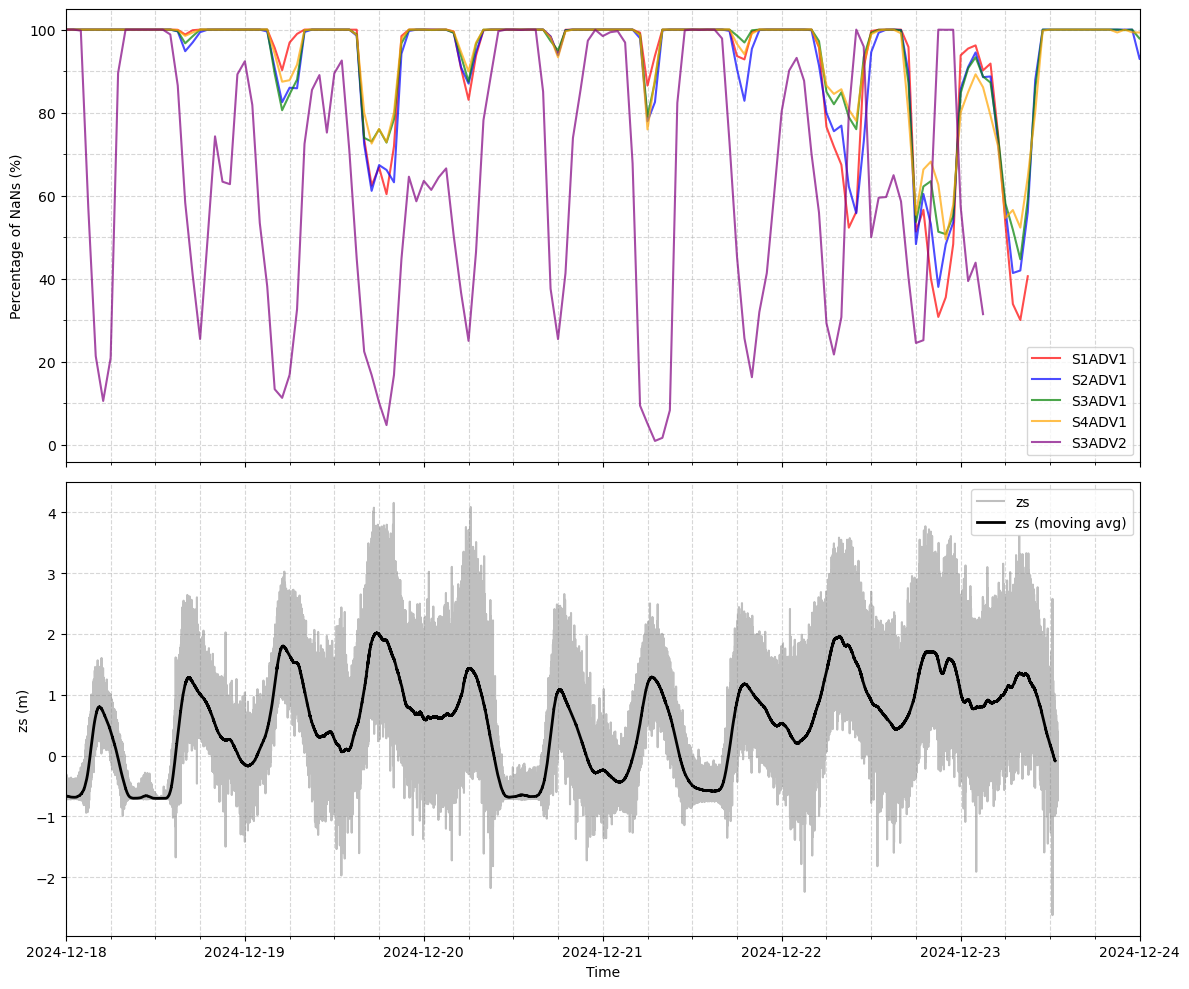

In [ ]:
blocklength =28720

pnan1 = 100 * np.isnan(ds1.u).sum(dim='N') / blocklength
pnan2 = 100 * np.isnan(ds2.u).sum(dim='N') / blocklength
pnan3 = 100 * np.isnan(ds3.u).sum(dim='N') / blocklength
pnan4 = 100 * np.isnan(ds4.u).sum(dim='N') / blocklength
pnan5 = 100 * np.isnan(ds5.u).sum(dim='N') / blocklength

pnan1b = 100 * np.isnan(ds1b.u).sum(dim='N') / blocklength
pnan2b = 100 * np.isnan(ds2b.u).sum(dim='N') / blocklength #*3
pnan3b = 100 * np.isnan(ds3b.u).sum(dim='N') / blocklength
pnan4b = 100 * np.isnan(ds4b.u).sum(dim='N') / blocklength
pnan5b = 100 * np.isnan(ds5b.u).sum(dim='N') / blocklength

zs = ds_RBR.zs[::8]
zs_ma = zs.rolling(t_full=4800, center=True).mean() # Calculate moving average of zs over 8hz*600s observations

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
# First subplot: Percentage of NaNs
axs[0].plot(ds1b.t, pnan1, label='S1ADV1', color='red',    alpha=0.7, linestyle='-')
axs[0].plot(ds2b.t, pnan2, label='S2ADV1', color='blue',   alpha=0.7 )
axs[0].plot(ds3.t, pnan3, label='S3ADV1', color='green',  alpha=0.7 )
axs[0].plot(ds4.t, pnan4, label='S4ADV1', color='orange', alpha=0.7 )
axs[0].plot(ds5.t, pnan5, label='S3ADV2', color='purple', alpha=0.7 )
axs[0].set_ylabel('Percentage of NaNs (%)')
axs[0].legend()
axs[0].set_xlim(np.datetime64('2024-12-18'), np.datetime64('2024-12-24'))
axs[0].grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
axs[0].set_yticks(np.arange(0, 110, 10), minor=True)
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=6)) 

# Second subplot: zs and its moving average
axs[1].plot(ds_RBR.t_full[::8], zs, label='zs', color='gray', alpha=0.5)
axs[1].plot(ds_RBR.t_full[::8], zs_ma, label='zs (moving avg)', color='black', linewidth=2)
axs[1].set_ylabel('zs (m)')
axs[1].set_xlabel('Time')
axs[1].legend()
axs[1].grid(True, which='both', axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
# Conclusion: during the storm, the deep ADV has batches 5-25% nan. The otherss have >60% nan (storm1) or 60-80% (storm2)

Text(0.5, 1.0, 'Details of velocity NaNs: beam correlation, velocity limit, velocity change')

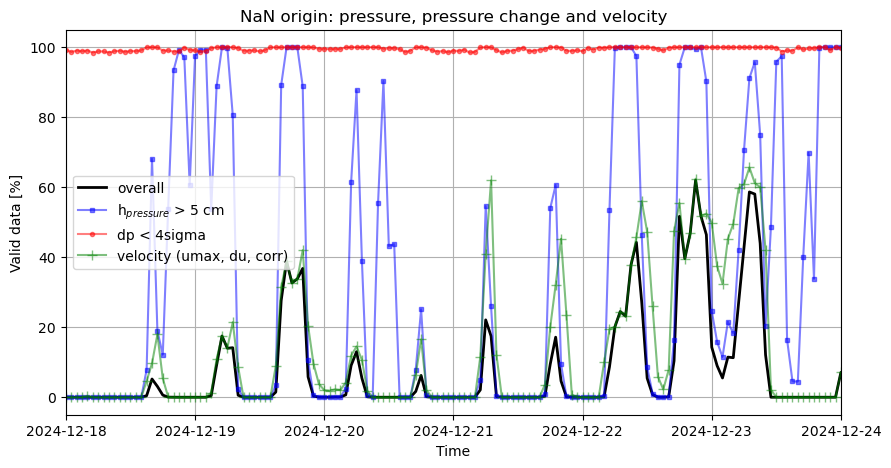

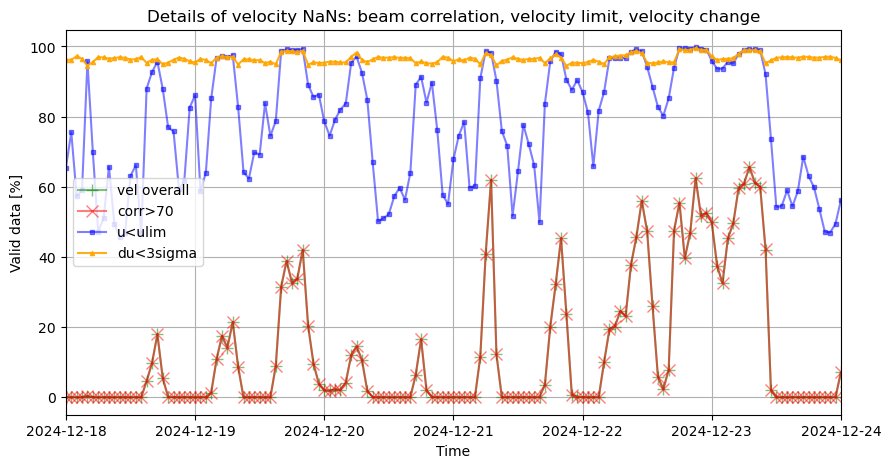

In [15]:
# EXPLORE EFFECT PER MASK
ds = ds2
blocklength = 28720
# define p_old and p_new, with the percentage of nans per burst in data
maskp = 100 * ds.maskp.sum(dim='N') / blocklength # dp < 4sigma
maskd = 100 * ds.maskd.sum(dim='N') / blocklength # zs < zi_p
maskv = 100 * ds.maskv.sum(dim='N') / blocklength # u<umax, du<4sigma, corr>70%
p_old = 100 - 100 * np.isnan(ds.u).sum(dim='N') / blocklength

mc = 100 * ds.mc.sum(dim='N') / blocklength # correlation
mu = 100 * ds.mu.sum(dim='N') / blocklength # abs(u)<u_lim
md = 100 * ds.md.sum(dim='N') / blocklength # du < 4sigma

# plot the percentage of nans before and after interpolation
plt.figure(figsize=(10, 5))
plt.plot(ds.t, p_old, label='overall', color='black', alpha=1, linestyle='-', linewidth=2)
plt.plot(ds.t, maskd, label='h$_{pressure}$ > 5 cm', color='blue', alpha=0.5, marker='s', markersize=3, linestyle='-')
plt.plot(ds.t, maskp, label='dp < 4sigma', color='red', alpha=0.5, marker='o', markersize=3, linestyle='-')
plt.plot(ds.t, maskv, label='velocity (umax, du, corr)', color='green', alpha=0.5, marker='+', markersize=7, linestyle='-')
plt.xlabel('Time')
plt.ylabel('Valid data [%]')
plt.legend()
plt.grid()
plt.xlim(np.datetime64('2024-12-18'), np.datetime64('2024-12-24'))
plt.title('NaN origin: pressure, pressure change and velocity')

plt.figure(figsize=(10, 5))
plt.plot(ds.t, maskv, label='vel overall', color='green', alpha=0.5, marker='+', markersize=8, linestyle='-')
plt.plot(ds.t, mc, label='corr>70', color='red', alpha=0.5, marker='x', markersize=8, linestyle='-')
plt.plot(ds.t, mu, label='u<ulim', color='blue', alpha=0.5, marker='s', markersize=3, linestyle='-')
plt.plot(ds.t, md, label='du<3sigma', color='orange', alpha=0.9, marker='^', markersize=3, linestyle='-')
plt.ylabel('Valid data [%]')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.xlim(np.datetime64('2024-12-18'), np.datetime64('2024-12-24'))
plt.title('Details of velocity NaNs: beam correlation, velocity limit, velocity change')



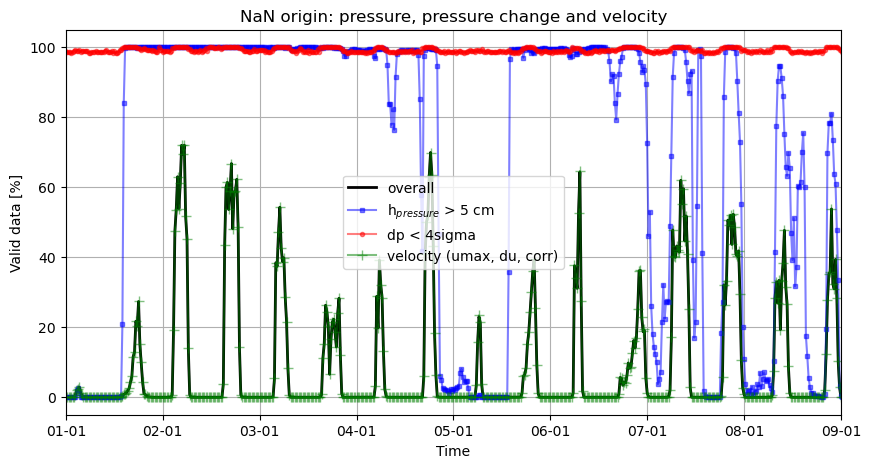

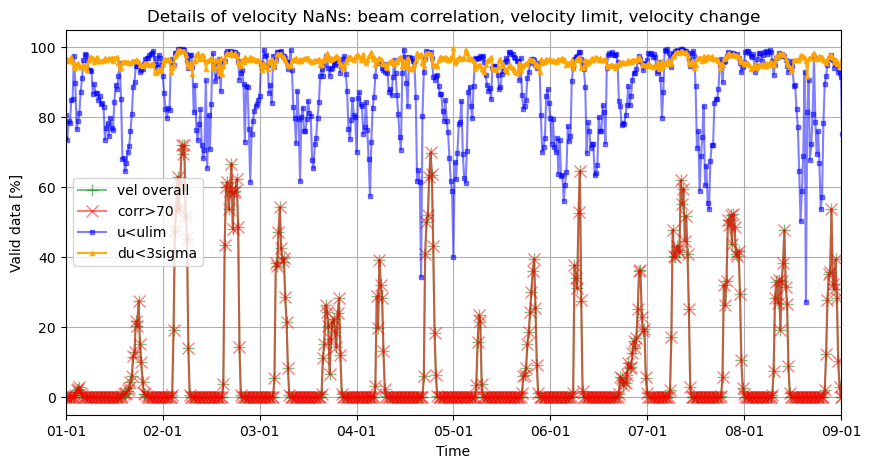

In [ ]:
# EXPLORE EFFECT PER MASK: deployment 2
ds = ds6b
blocklength = 1200*8
# define p_old and p_new, with the percentage of nans per burst in data
maskp = 100 * ds.maskp.sum(dim='N') / blocklength # dp < 4sigma
maskd = 100 * ds.maskd.sum(dim='N') / blocklength # zs < zi_p
maskv = 100 * ds.maskv.sum(dim='N') / blocklength # u<umax, du<4sigma, corr>70%
p_old = 100 - 100 * np.isnan(ds.u).sum(dim='N') / blocklength

mc = 100 * ds.mc.sum(dim='N') / blocklength # correlation
mu = 100 * ds.mu.sum(dim='N') / blocklength # abs(u)<u_lim
md = 100 * ds.md.sum(dim='N') / blocklength # du < 4sigma

# plot the percentage of nans before and after interpolation
plt.figure(figsize=(10, 5))
plt.plot(ds.t, p_old, label='overall', color='black', alpha=1, linestyle='-', linewidth=2)
plt.plot(ds.t, maskd, label='h$_{pressure}$ > 5 cm', color='blue', alpha=0.5, marker='s', markersize=3, linestyle='-')
plt.plot(ds.t, maskp, label='dp < 4sigma', color='red', alpha=0.5, marker='o', markersize=3, linestyle='-')
plt.plot(ds.t, maskv, label='velocity (umax, du, corr)', color='green', alpha=0.5, marker='+', markersize=7, linestyle='-')
plt.xlabel('Time')
plt.ylabel('Valid data [%]')
plt.legend()
plt.grid()
plt.xlim(np.datetime64('2025-01-01'), np.datetime64('2025-01-09'))
plt.title('NaN origin: pressure, pressure change and velocity')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.figure(figsize=(10, 5))
plt.plot(ds.t, maskv, label='vel overall', color='green', alpha=0.5, marker='+', markersize=8, linestyle='-')
plt.plot(ds.t, mc, label='corr>70', color='red', alpha=0.5, marker='x', markersize=8, linestyle='-')
plt.plot(ds.t, mu, label='u<ulim', color='blue', alpha=0.5, marker='s', markersize=3, linestyle='-')
plt.plot(ds.t, md, label='du<3sigma', color='orange', alpha=0.9, marker='^', markersize=3, linestyle='-')
plt.ylabel('Valid data [%]')
plt.xlabel('Time')
plt.legend()
plt.grid()
plt.xlim(np.datetime64('2025-01-01'), np.datetime64('2025-01-09'))
plt.title('Details of velocity NaNs: beam correlation, velocity limit, velocity change')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.show()

Text(0.5, 1.0, 'Water depth above bed')

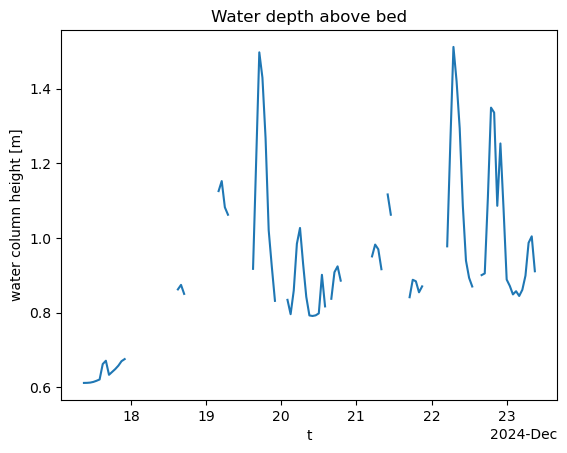

In [16]:
ds1.h.plot()
plt.title('Water depth above bed')

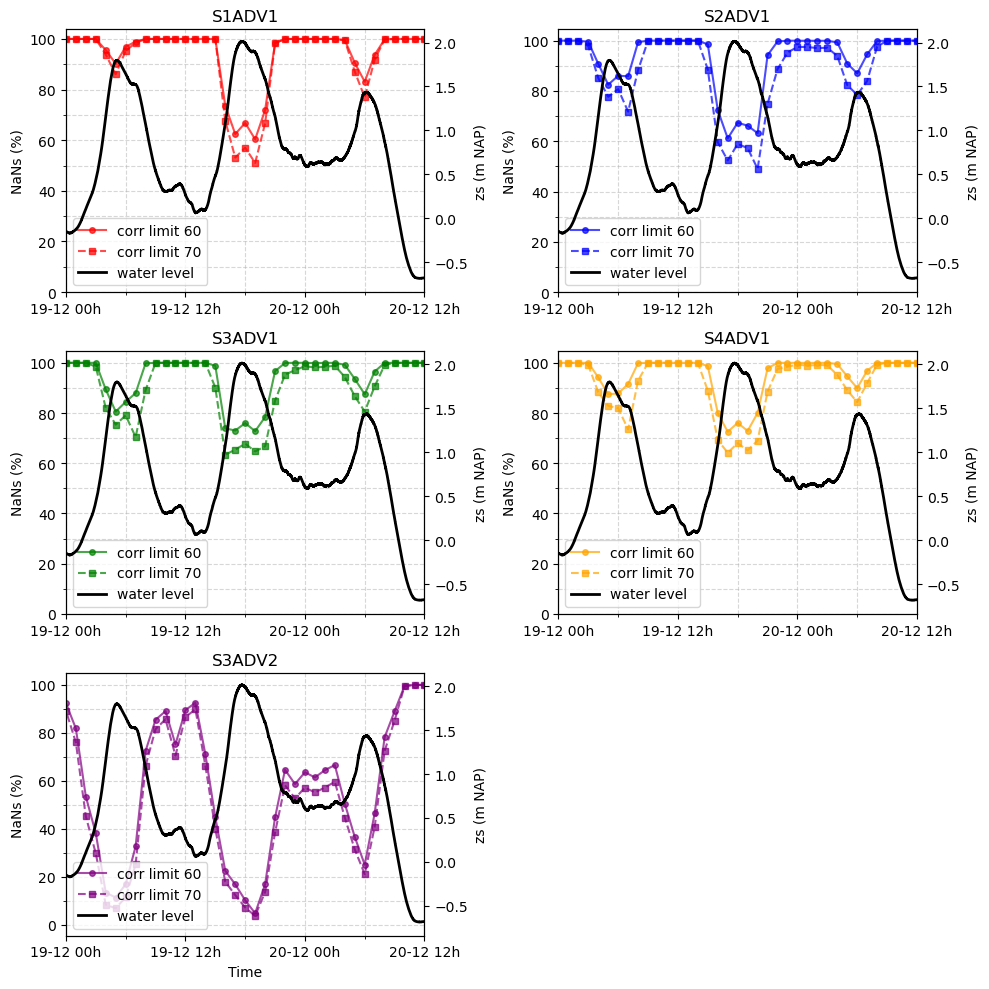

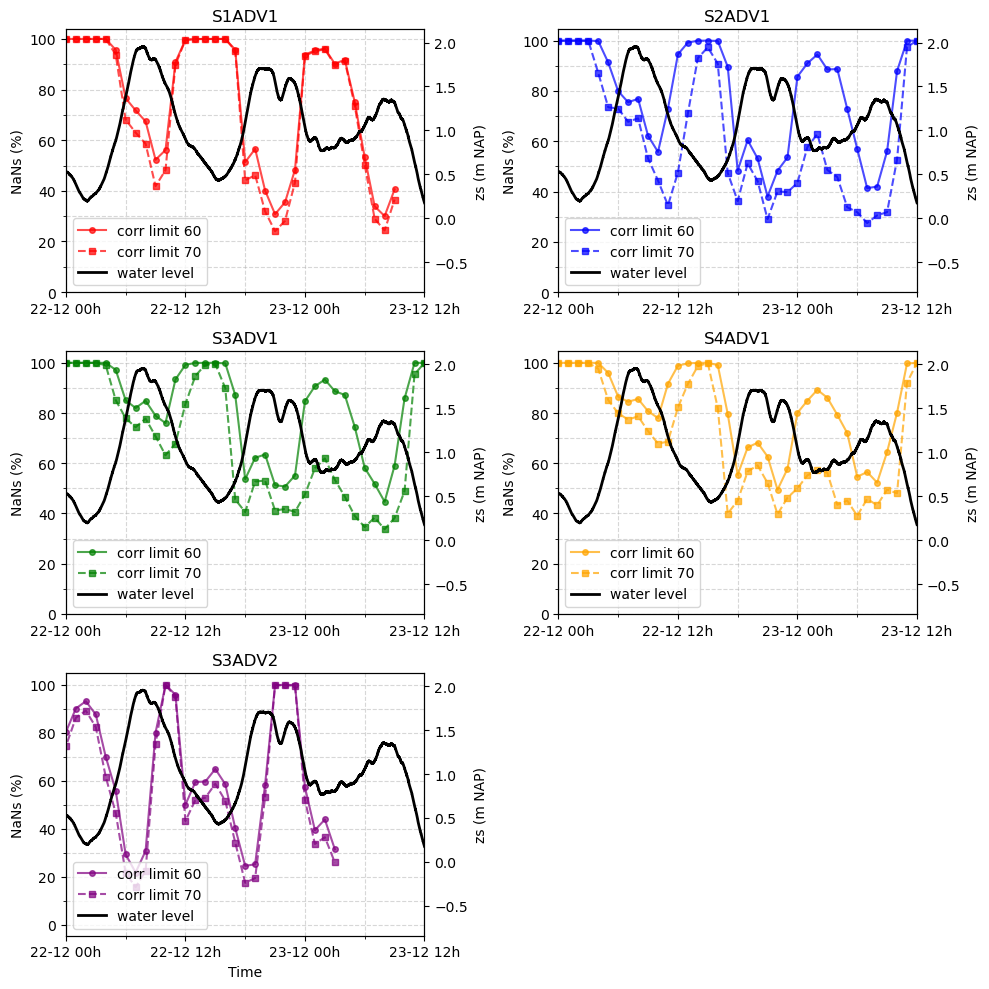

In [103]:
# EXPLORE EFFECT OF CORRELATION THRESHOLD
advs = [
    {'ds': ds1,  'dsb': ds1b,  'pnan': pnan1,  'pnanb': pnan1b,  'color': 'red',    'label': 'S1ADV1',  'title': 'S1ADV1'},
    {'ds': ds2,  'dsb': ds2b,  'pnan': pnan2,  'pnanb': pnan2b,  'color': 'blue',   'label': 'S2ADV1',  'title': 'S2ADV1'},
    {'ds': ds3,  'dsb': ds3b,  'pnan': pnan3,  'pnanb': pnan3b,  'color': 'green',  'label': 'S3ADV1',  'title': 'S3ADV1'},
    {'ds': ds4,  'dsb': ds4b,  'pnan': pnan4,  'pnanb': pnan4b,  'color': 'orange', 'label': 'S4ADV1',  'title': 'S4ADV1'},
    {'ds': ds5,  'dsb': ds5b,  'pnan': pnan5,  'pnanb': pnan5b,  'color': 'purple', 'label': 'S3ADV2',  'title': 'S3ADV2'},
]

fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, adv in enumerate(advs):
    l1 = axs[i].plot(adv['ds'].t, adv['pnan'], label='corr limit 60', color=adv['color'], alpha=0.7, marker='o', markersize=4)
    l2 = axs[i].plot(adv['dsb'].t, adv['pnanb'], label='corr limit 70', color=adv['color'], alpha=0.7, linestyle='--', marker='s', markersize=4)
    ax2 = axs[i].twinx()
    l3 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='water level', color='black', linewidth=2)
    ax2.set_ylabel('zs (m NAP)')
    axs[i].set_ylabel('NaNs (%)')
    # Combine legends from both axes
    lines = l1 + l2 + l3
    labels = [line.get_label() for line in lines]
    axs[i].legend(lines, labels, loc='lower left')
    axs[i].set_title(adv['title'])
    axs[i].grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
    axs[i].set_xlim(np.datetime64('2024-12-19 00:00'), np.datetime64('2024-12-20 12:00'))
    axs[i].set_yticks(np.arange(0, 110, 10), minor=True)
    axs[i].xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=12))
    axs[i].tick_params(labelbottom=True)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %Hh'))


# Hide the last empty subplot if needed
if len(advs) < len(axs):
    for j in range(len(advs), len(axs)):
        fig.delaxes(axs[j])

axs[-2].set_xlabel('Time')
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

# SECOND SUBPLOT: STORM 2
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, adv in enumerate(advs):
    l1 = axs[i].plot(adv['ds'].t, adv['pnan'], label='corr limit 60', color=adv['color'], alpha=0.7, marker='o', markersize=4)
    l2 = axs[i].plot(adv['dsb'].t, adv['pnanb'], label='corr limit 70', color=adv['color'], alpha=0.7, linestyle='--', marker='s', markersize=4)
    ax2 = axs[i].twinx()
    l3 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='water level', color='black', linewidth=2)
    ax2.set_ylabel('zs (m NAP)')
    axs[i].set_ylabel('NaNs (%)')
    # Combine legends from both axes
    lines = l1 + l2 + l3
    labels = [line.get_label() for line in lines]
    axs[i].legend(lines, labels, loc='lower left')
    axs[i].set_title(adv['title'])
    axs[i].grid(True, which='both', axis='both', linestyle='--', alpha=0.5)
    axs[i].set_xlim(np.datetime64('2024-12-22 00:00'), np.datetime64('2024-12-23 12:00'))
    axs[i].set_yticks(np.arange(0, 110, 10), minor=True)
    axs[i].xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=12))
    axs[i].tick_params(labelbottom=True)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %Hh'))


# Hide the last empty subplot if needed
if len(advs) < len(axs):
    for j in range(len(advs), len(axs)):
        fig.delaxes(axs[j])

axs[-2].set_xlabel('Time')
axs[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

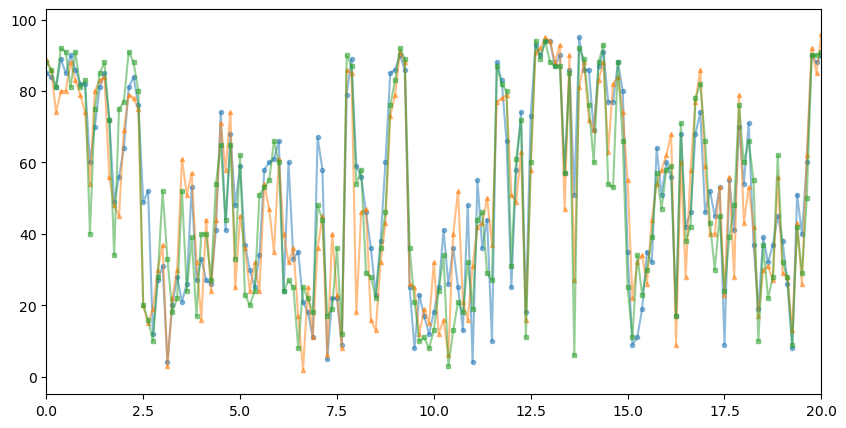

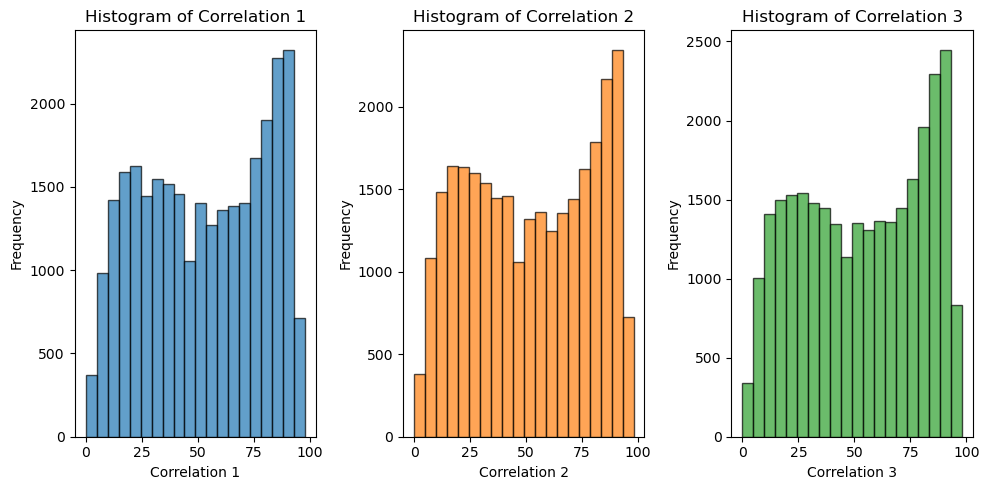

In [ ]:
# EXAMINE SIGNAL AMPLITUDE, CORRELATION, SNR
ds = ds_raw # raw file, QC does not have correlation data anymore
ds_crop = ds.copy().__deepcopy__()

# Select (crop) 1 hour of data, to plot timeseries
t_max = ds.t[ds.p.mean(dim='N').argmax().values].values # select time of highest water
ds_crop  = ds_crop.sel(t=slice(t_max, t_max))
ds_crop = ds_crop.squeeze() # remove singleton dimensions

t = ds_crop.t # redefine t, for cropped dataset
N = ds_crop.N

# plot t vs mean p
plt.figure(figsize=(10, 5))
# plt.plot(N,ds.u)  # u velocity
# plt.plot(N, ds.v)  # v velocity
# plt.plot(N,ds.w)
# plt.plot(N,ds.snr1,'*-', markersize=3) # SNR, fairly constant (45-57)
# plt.plot(N,ds.a1,'*-', markersize=3)   # amplitude, fairly constant (140-170)
plt.plot(N,ds_crop.cor1,'o-', markersize=3, alpha=0.5)
plt.plot(N,ds_crop.cor2,'^-', markersize=3, alpha=0.5)
plt.plot(N,ds_crop.cor3,'s-', markersize=3, alpha=0.5)
plt.xlim([0, 20])


# make a new plot, with a histogam of cor1, cor2 and cor3
plt.figure(figsize=(10, 5))
bins = 20

plt.subplot(1, 3, 1)
plt.hist(ds_crop.cor1, bins=bins, color='C0', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 1')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 1')

plt.subplot(1, 3, 2)
plt.hist(ds_crop.cor2, bins=bins, color='C1', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 2')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 2')

plt.subplot(1, 3, 3)
plt.hist(ds_crop.cor3, bins=bins, color='C2', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 3')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 3')

plt.tight_layout()
plt.show()


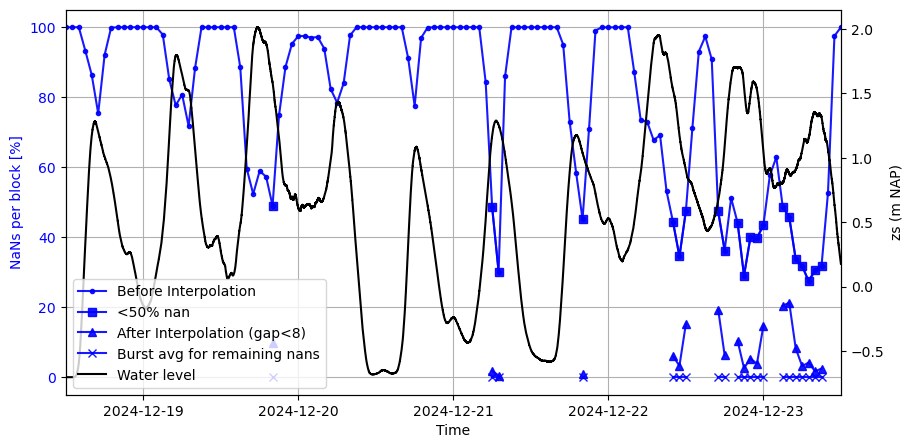

In [ ]:
# DEMONSTRATE NAN FILTERING, INTERPOLATION IN STEPS, FOR SINGLE ADV
ds = ds2b.copy().__deepcopy__()
# interpolate nans
N = len(ds.N)
for var in ['u']: #, 'v', 'p', 'eta']:
    # interpolate the bursts where there is less than 5% nans
    data_old = ds[var]
    data = ds[var].where(
        np.isnan(ds[var]).sum(dim='N') < 0.5 * len(ds.N)   # Daan: temporary 50% isntead of 5%
        )#.dropna(dim='t', how='all')  # make burstst with >5% nan completely nan, then drop burst with all nans
    if len(data.t) != 0: # if any burst remaining, fill gaps less than 8 in length with cubic interpolation
        data2 = data.interpolate_na(
            dim='N',
            method='cubic',
            max_gap=8)

    # and fill the gaps more than 8 in length with the burst average
    data3 = data2.fillna(ds[var].mean(dim='N'))

# define p_old and p_new, with the percentage of nans per burst in data
p_old = 100 * np.isnan(data_old).sum(dim='N') / N
p_new = 100 * np.isnan(data).sum(dim='N') / N
p_new2 = 100 * np.isnan(data2).sum(dim='N') / N
p_new3 = 100 * np.isnan(data3).sum(dim='N') / N

# make p_new nan where 100 (so that the line is interrupted in plotting)
p_new = p_new.where(p_new<100)
p_new2 = p_new2.where(p_new2<100)
p_new3 = p_new3.where(p_new2<100)

# plot the percentage of nans before and after interpolation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
l1 = plt.plot(ds.t, p_old, label='Before Interpolation', color='blue', alpha=0.9, marker='o', markersize=3, linestyle='-')
l2 = plt.plot(data.t, p_new, 's-', label='<50% nan', color='blue', alpha=0.9)
l3 = plt.plot(data2.t, p_new2, '-^', label='After Interpolation (gap<8)', color='blue', alpha=0.9)
l4 = plt.plot(data3.t, p_new3, 'x-', label='Burst avg for remaining nans', color='blue', alpha=0.9)
plt.xlabel('Time')
plt.ylabel('NaNs per block [%]', color='blue')
plt.grid()
plt.tick_params(axis='y', labelcolor='blue')

ax2 = plt.gca().twinx()
l5 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='Water level', color='black')
ax2.set_ylabel('zs (m NAP)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_xlim(np.datetime64('2024-12-18 12:00'), np.datetime64('2024-12-23 12:00'))

# Combine legends from both axes
lines = l1 + l2 + l3 + l4 + l5
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='lower left')


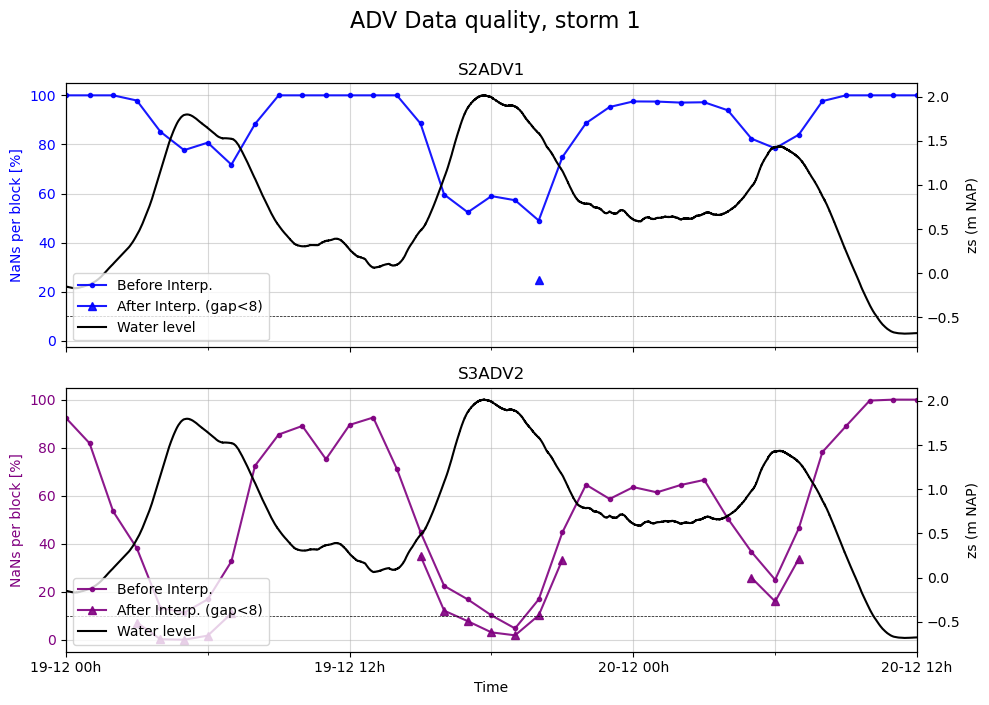

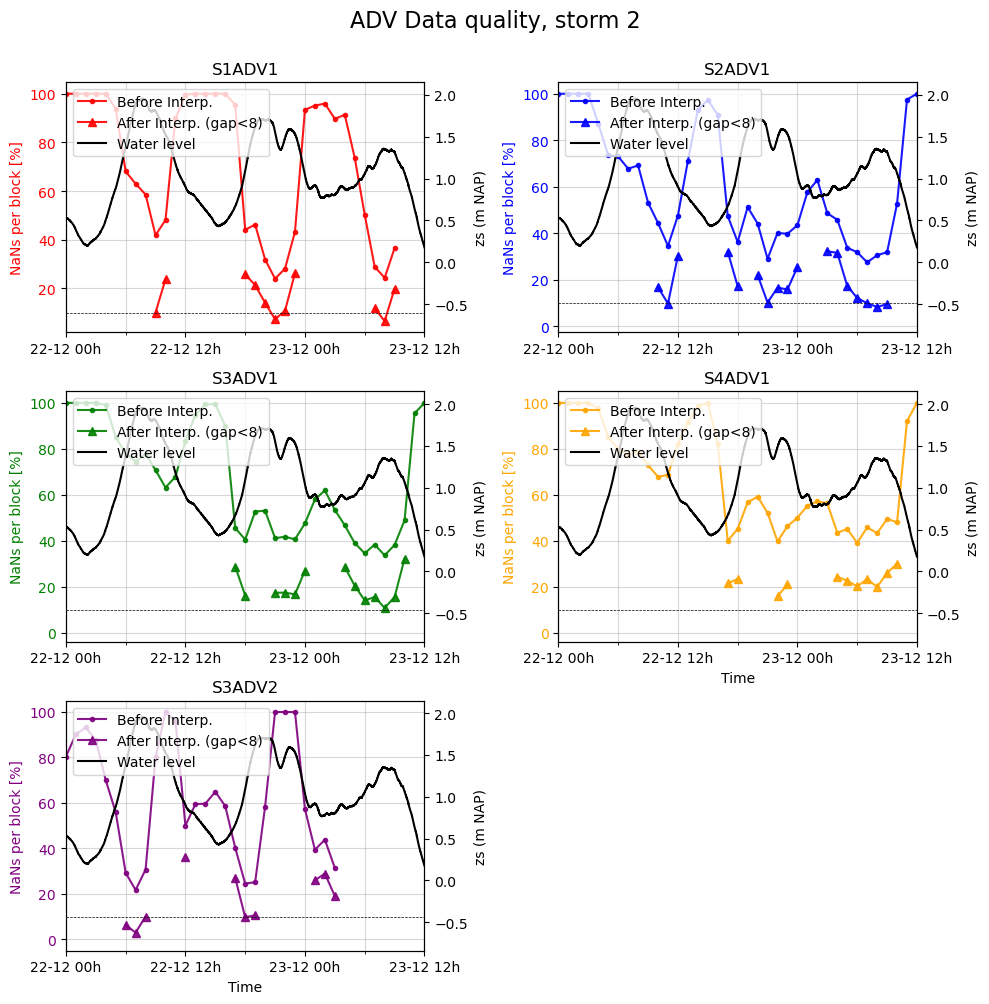

In [247]:
# COMBINE THE TWO PREVIOUS SECTIONS: PLOT, FOR EVERY ADV, THE NAN PERCENTAGE BEFORE AND AFTER INTERPOLATION, TOGETHER WITH THE WATER LEVEL

# TEST, PLOT NAN FILTERING
max_gap_setting = 3 # seconds

# List of datasets and labels for each ADV. Only these two have any data after filtering
datasets = [    (ds2b, 'S2ADV1', 'blue'),
                (ds5, 'S3ADV2', 'purple') ]

fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
axs = axs.flatten()

for i, (dsb, label, color) in enumerate(datasets):
    ds = dsb.copy().__deepcopy__()
    N = len(ds.N)
    data_old = ds['u']
    data = ds['u'].where(np.isnan(ds['u']).sum(dim='N') < 0.5 * len(ds.N))
    if len(data.t) != 0:
        data2 = data.interpolate_na(dim='N', method='cubic', max_gap=max_gap_setting)
    else:
        data2 = data

    p_old = 100 * np.isnan(data_old).sum(dim='N') / N
    p_new2 = 100 * np.isnan(data2).sum(dim='N') / N
    p_new2 = p_new2.where(p_new2 < 100)

    ax = axs[i]
    l1 = ax.plot(ds.t, p_old, label='Before Interp.', color=color, alpha=0.9, marker='o', markersize=3, linestyle='-')
    l2 = ax.plot(data2.t, p_new2, '-^', label='After Interp. (gap<8)', color=color, alpha=0.9)
    ax.set_title(label)
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.5)

    ax.set_ylabel('NaNs per block [%]', color=color)
    ax.tick_params(axis='y', labelcolor=color)
    
    ax.set_xlim(np.datetime64('2024-12-19 00:00'), np.datetime64('2024-12-20 12:00'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %Hh'))
    ax.axhline(10, color='black', linestyle='--', linewidth=0.5)     # add a horizontal line at 10%

    # Second y-axis for water level
    ax2 = ax.twinx()
    l3 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='Water level', color='black')
    ax2.set_ylabel('zs (m NAP)', color='black')

    # Combine legends from both axes
    lines = l1 + l2 + l3
    labels = [line.get_label() for line in lines]
    ax2.legend(lines, labels, loc='lower left')

axs[-1].set_xlabel('Time')
fig.suptitle('ADV Data quality, storm 1', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()


# REPEAT FOR SECOND STORM, NOW WITH 5 SUBPLOTS (5 ADVs) ------------------------------------------------------------
datasets = [
    (ds1b, 'S1ADV1', 'red'),
    (ds2b, 'S2ADV1', 'blue'),
    (ds3b, 'S3ADV1', 'green'),
    (ds4b, 'S4ADV1', 'orange'),
    (ds5, 'S3ADV2', 'purple'),
]

fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
axs = axs.flatten()

for i, (dsb, label, color) in enumerate(datasets):
    ds = dsb.copy().__deepcopy__()
    N = len(ds.N)
    data_old = ds['u']
    data = ds['u'].where(np.isnan(ds['u']).sum(dim='N') < 0.5 * len(ds.N))
    if len(data.t) != 0:
        data2 = data.interpolate_na(dim='N', method='cubic', max_gap=max_gap_setting)
    else:
        data2 = data

    p_old = 100 * np.isnan(data_old).sum(dim='N') / N
    p_new2 = 100 * np.isnan(data2).sum(dim='N') / N
    p_new2 = p_new2.where(p_new2 < 100)

    ax = axs[i]
    l1 = ax.plot(ds.t, p_old, label='Before Interp.', color=color, alpha=0.9, marker='o', markersize=3, linestyle='-')
    l2 = ax.plot(data2.t, p_new2, '-^', label='After Interp. (gap<8)', color=color, alpha=0.9)
    ax.set_title(label)
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.5)

    ax.set_ylabel('NaNs per block [%]', color=color)
    ax.tick_params(axis='y', labelcolor=color)
    
    ax.set_xlim(np.datetime64('2024-12-22 00:00'), np.datetime64('2024-12-23 12:00'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
    ax.tick_params(labelbottom=True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %Hh'))
    ax.axhline(10, color='black', linestyle='--', linewidth=0.5)     # add a horizontal line at 10%

    # Second y-axis for water level
    ax2 = ax.twinx()
    l3 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='Water level', color='black')
    ax2.set_ylabel('zs (m NAP)', color='black')

    # Combine legends from both axes
    lines = l1 + l2 + l3
    labels = [line.get_label() for line in lines]
    ax2.legend(lines, labels, loc='upper left')

# Hide the last empty subplot if needed
if len(datasets) < len(axs):
    for j in range(len(datasets), len(axs)):
        fig.delaxes(axs[j])

axs[-2].set_xlabel('Time')
axs[-3].set_xlabel('Time')
fig.suptitle('ADV Data quality, storm 2', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

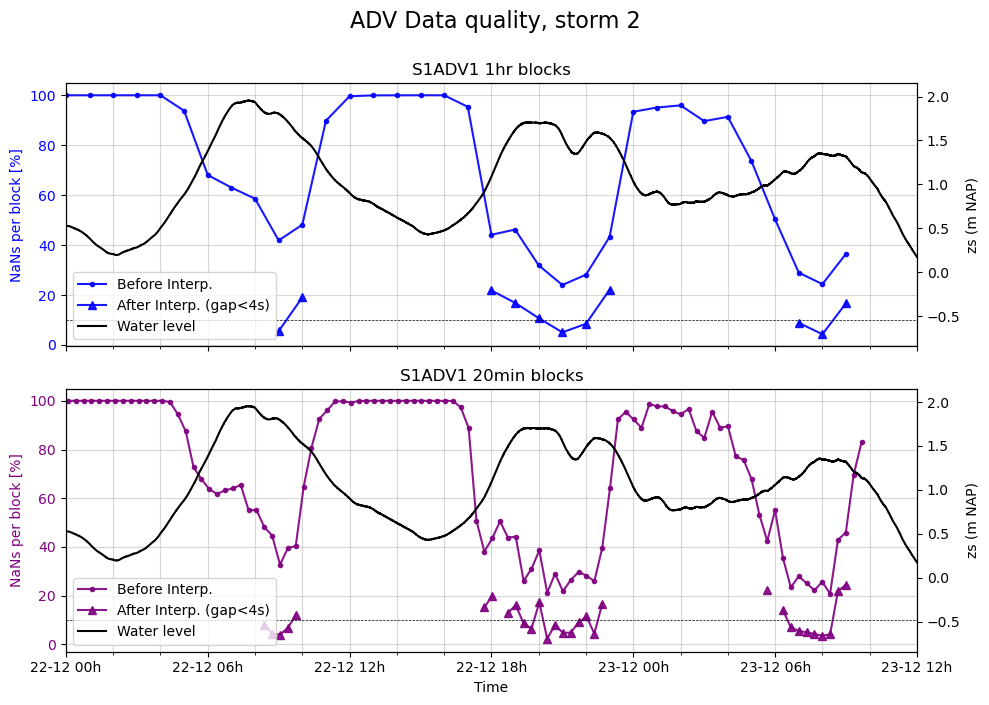

In [10]:
# COMPARE 1HR AND 20MIN BLOCKS. SAME SYSTEM AS FIRST FIGURE ABOVE

# TEST, PLOT NAN FILTERING
max_gap_setting = 4 # seconds

# List of datasets and labels for each ADV. Only these two have any data after filtering
datasets = [    (ds1b, 'S1ADV1 1hr blocks', 'blue'),
                (ds2b, 'S1ADV1 20min blocks', 'purple') ]

fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
axs = axs.flatten()

for i, (dsb, label, color) in enumerate(datasets):
    ds = dsb.copy().__deepcopy__()
    N = len(ds.N)
    data_old = ds['u']
    data = ds['u'].where(np.isnan(ds['u']).sum(dim='N') < 0.5 * len(ds.N))
    if len(data.t) != 0:
        data2 = data.interpolate_na(dim='N', method='cubic', max_gap=max_gap_setting)
    else:
        data2 = data

    p_old = 100 * np.isnan(data_old).sum(dim='N') / N
    p_new2 = 100 * np.isnan(data2).sum(dim='N') / N
    p_new2 = p_new2.where(p_new2 < 100)

    ax = axs[i]
    l1 = ax.plot(ds.t, p_old, label='Before Interp.', color=color, alpha=0.9, marker='o', markersize=3, linestyle='-')
    l2 = ax.plot(data2.t, p_new2, '-^', label='After Interp. (gap<4s)', color=color, alpha=0.9)
    ax.set_title(label)
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.5)

    ax.set_ylabel('NaNs per block [%]', color=color)
    ax.tick_params(axis='y', labelcolor=color)
    
    ax.set_xlim(np.datetime64('2024-12-22 00:00'), np.datetime64('2024-12-23 12:00'))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %Hh'))
    ax.axhline(10, color='black', linestyle='--', linewidth=0.5)     # add a horizontal line at 10%

    # Second y-axis for water level
    ax2 = ax.twinx()
    l3 = ax2.plot(ds_RBR.t_full[::80], zs_ma[::10], label='Water level', color='black')
    ax2.set_ylabel('zs (m NAP)', color='black')

    # Combine legends from both axes
    lines = l1 + l2 + l3
    labels = [line.get_label() for line in lines]
    ax2.legend(lines, labels, loc='lower left')

axs[-1].set_xlabel('Time')
fig.suptitle('ADV Data quality, storm 2', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

max of data2: 1.594


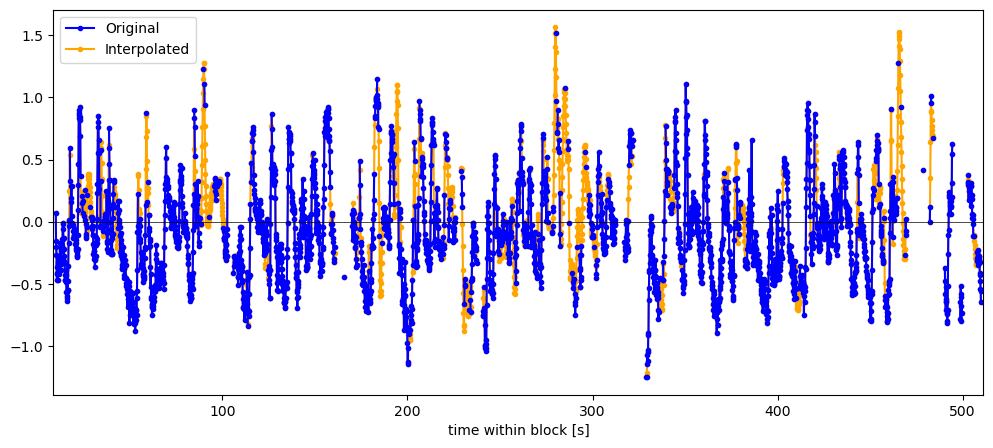

In [ ]:
# TEST, PLOT INTERPOLATION: ZOOMED-IN TIME SERIES
ds = ds2b.copy().__deepcopy__()
t_max = np.datetime64('2024-12-22 21:00')#  ds.t[ds.pc.mean(dim='N').argmax().values].values # select time of highest water
ds  = ds.sel(t=slice(t_max, t_max))

# interpolate the bursts where there is less than 50% nans
data_old = ds['u']
data = ds['u'].where(
    np.isnan(ds['u']).sum(dim='N') < 0.5 * len(ds.N)   # Daan: temporary 50% isntead of 5%
    ).dropna(dim='t', how='all')  # make burstst with >50% nan completely nan, then drop burst with all nans

# if any burst remaining, fill gaps less than 8 in length with cubic interpolation
data = data.squeeze() # remove singleton dimensions
data2 = data.interpolate_na( dim='N', method='cubic', max_gap=3)  #gap width, in seconds

# and fill the gaps more than 8 in length with the burst average
data3 = data2.fillna(ds['u'].mean(dim='N'))

# make a plot with data and data2 ------------------------------------------------
plt.figure(figsize=(12, 5))
x_start = 10 # start index, in seconds
dx = 500

# plt.plot(data.N, data, 'o-', markersize=3, label='Original', color='blue')
# plt.plot(data2.N, data2, 'o-', markersize=3, label='Interpolated', color='orange',zorder=0)

plt.plot(data.N[x_start*8:(x_start+dx)*8], data[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='Original', color='blue')
plt.plot(data2.N[x_start*8:(x_start+dx)*8], data2[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='Interpolated', color='orange',zorder=0)
plt.legend()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)     # add a horizontal line at y=0
plt.xlim(data.N[x_start*8-10], data.N[(x_start+dx)*8+10])
plt.xlabel('time within block [s]')
# print the max of data2
print('max of data2:', np.nanmax(data))

To do
- Check interpolation: u,v vs cross,longshore.  Anser: no difference at all!
- Check direction: umean grof vs officieel. En effect weglaten grootste u, du

Text(0.5, 0, 'time within block [s]')

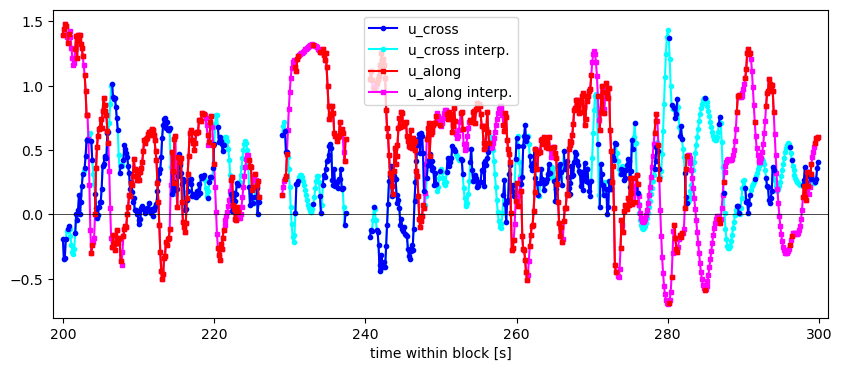

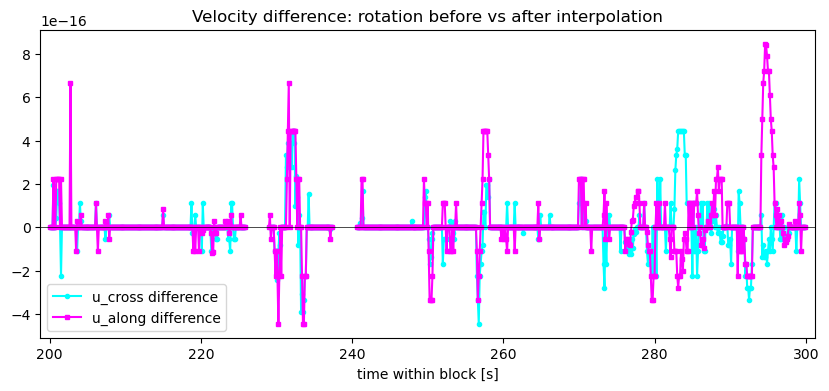

In [ ]:
# INTERPOLATION: COMPARE U,V VS ALONG, CROSS SHORE INTERPOLATION.   AGAIN, ZOOMED-IN TIMESERIES PLOT
t_max = np.datetime64('2024-12-22 21:00')#  ds.t[ds.pc.mean(dim='N').argmax().values].values # select time of highest water
max_gap_setting = 3 # seconds

ds = ds2b.copy().__deepcopy__()
ds  = ds.sel(t=slice(t_max, t_max))

def rotate_velocities(u, v, thet):
    '''
    rotates vector (or array) [u,v] clockwise over angle thet (degrees)
    '''
    theta = thet / 180 * np.pi
    u_rot = u * np.cos(theta) + v * np.sin(theta)
    v_rot = -u * np.sin(theta) + v * np.cos(theta)
    return u_rot, v_rot
# Rotate x,y,z adv velocities to ENU velocities (this is only necessary if measurements were performed in XYZ)
#rotate_velocities(1,0, 310-90) # -90: with unrotated grid, so u_local=u_rotated, the grid angle is 270deg wrt north, not 0deg. 

# Rotate ENU velocities to u_loc, y_loc, w velocities
#rotate_velocities(1,0, theta_deg)

# interpolate the bursts where there is less than 50% nans. Then squeeze, since a sinlge block is selected
u_x = ds['u'].where(  np.isnan(ds['u']).sum(dim='N') < 0.5 * len(ds.N)  ).dropna( dim='t', how='all' ).squeeze( )  
u_y = ds['v'].where(  np.isnan(ds['v']).sum(dim='N') < 0.5 * len(ds.N)  ).dropna( dim='t', how='all' ).squeeze( )  

# if any burst remaining, fill gaps less than 3s in length with cubic interpolation
u_x_int = u_x.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds
u_y_int = u_y.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds

# rotate --------------
theta_deg = 36 # rotate by 36 degrees
u_cross = u_x.copy()
u_along = u_y.copy()
u_cross_int = u_x_int.copy()      # pre-define
u_along_int = u_y_int.copy()

[u_cross.values, u_along.values] = rotate_velocities(u_x.values, u_y.values, theta_deg)
[u_cross_int.values, u_along_int.values] = rotate_velocities(u_x_int.values, u_y_int.values, theta_deg)

# Redo interpolation, now for cross, alongshore data
u_cross_intB = u_cross.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds
u_along_intB = u_along.interpolate_na( dim='N', method='cubic', max_gap=max_gap_setting)  #gap width, in seconds

# make a plot with ux, uy and interpolated versions  ------------------------------------------------
x_start = 200 # start index, in seconds
dx = 100

# rotated AFTER interpolation ------------------------------------------------
plt.figure(figsize=(10, 4))
# plt.plot(u_x.N    [x_start*8:(x_start+dx)*8], u_x    [x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_x', color='blue')
# plt.plot(u_x_int.N[x_start*8:(x_start+dx)*8], u_x_int[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_x nterpolated', color='cyan',zorder=0)
# plt.plot(u_y.N    [x_start*8:(x_start+dx)*8], u_y    [x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_y', color='red')
# plt.plot(u_y_int.N[x_start*8:(x_start+dx)*8], u_y_int[x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_y interpolated', color='magenta',zorder=0)plt.plot(u_cross.N    [x_start*8:(x_start+dx)*8], u_cross    [x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_cross', color='blue')
plt.plot(u_cross_int.N[x_start*8:(x_start+dx)*8], u_cross_int[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_cross interp.', color='cyan',zorder=0)
plt.plot(u_along.N    [x_start*8:(x_start+dx)*8], u_along    [x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_along', color='red')
plt.plot(u_along_int.N[x_start*8:(x_start+dx)*8], u_along_int[x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_along interp.', color='magenta',zorder=0)

plt.legend()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)     # add a horizontal line at y=0
plt.xlim(data.N[x_start*8-10], data.N[(x_start+dx)*8+10])
plt.xlabel('time within block [s]')

# rotated BEFORE vs AFTER interpolation ------------------------------------------------
plt.figure(figsize=(10, 4))
plt.plot(u_cross_intB.N[x_start*8:(x_start+dx)*8], u_cross_int-u_cross_intB[x_start*8:(x_start+dx)*8], 'o-', markersize=3, label='u_cross difference', color='cyan',zorder=0)
plt.plot(u_along_intB.N[x_start*8:(x_start+dx)*8], u_along_int-u_along_intB[x_start*8:(x_start+dx)*8], 's-', markersize=3, label='u_along difference', color='magenta',zorder=0)
plt.title('Velocity difference: rotation before vs after interpolation')

plt.legend()
plt.axhline(0, color='black', linestyle='-', linewidth=0.5)     # add a horizontal line at y=0
plt.xlim(data.N[x_start*8-10], data.N[(x_start+dx)*8+10])
plt.xlabel('time within block [s]')

In [14]:
# Determine direction
ds1

<xarray.Dataset> Size: 304MB
Dimensions:       (t: 145, N: 28720, t_theta: 2, t_zb: 5, t_zi: 2, zi: 2)
Coordinates:
  * t             (t) datetime64[ns] 1kB 2024-12-17T09:00:00 ... 2024-12-23T0...
  * N             (N) float64 230kB 0.0 0.125 0.25 ... 3.59e+03 3.59e+03
  * t_theta       (t_theta) datetime64[ns] 16B 2024-12-17T09:00:00 2024-12-22...
  * t_zb          (t_zb) datetime64[ns] 40B 2024-12-17T11:30:00 ... 2024-12-2...
  * t_zi          (t_zi) datetime64[ns] 16B 2024-12-17T11:30:00 2024-12-21T14...
  * zi            (zi) float64 16B 0.953 0.731
    maskp         (t, N) bool 4MB True True True True ... False False False
    maskv         (t, N) bool 4MB False False False False ... True True True
    maskd         (t, N) bool 4MB False False False False ... False False True
    maskd2        (t, N) bool 4MB True True True True ... True False False True
Data variables: (12/44)
    sf            float64 8B 8.0
    u             (t, N) float64 33MB nan nan nan nan nan ... nan nan nan nan
    v             (t, N) float64 33MB nan nan nan nan nan ... nan nan nan nan
    w             (t, N) float64 33MB nan nan nan nan nan ... nan nan nan nan
    burst         (t, N) float64 33MB 97.0 97.0 97.0 97.0 ... 241.0 241.0 242.0
    pm            (t) float64 1kB 517.2 538.0 510.3 ... 2.932e+03 1.723e+03
    ...            ...
    zsmean        (t) float64 1kB 1.312 1.312 1.313 1.314 ... 1.46 1.476 1.382
    h             (t) float64 1kB 0.612 0.6123 0.6129 ... 0.9872 1.005 0.911
    C_OBShigh     (t, N) float64 33MB nan nan nan nan nan ... nan nan nan nan
    C_OBSlow      (t, N) float64 33MB nan nan nan nan nan ... nan nan nan nan
    mask_OBShigh  (t, N) bool 4MB True True True True ... True True True True
    mask_OBSlow   (t, N) bool 4MB True True True True ... True True True True
Attributes: (12/14)
    Conventions:               CF-1.6
    title:                     S1ADV1 raw data - period 1
    instrument:                Nortek Vector
    instrument serial number:  VEC13638
    connected OBS type:        Cambell OBS3+
    time zone:                 UTC+1
    ...                        ...
    contact person:            Daan Poppema
    emailadres:                d.w.poppema@tudelft.nl
    construction datetime:     08-Oct-2025 (19:02:59)
    version:                   v2
    version comments:          constructed with xarray
    comment:                   Quality checked data: pressure level corrected...